In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data/"
path_to_results="../results/"

In [5]:
plt_df=pd.read_csv(path_to_data+"Data_for_Figure2.tsv",sep="\t",index_col=0)
plt_df

,CancerType,SEX,sTP53_mutdel,Gender_sTP53m,HA_cases,BRCA12_alteration,HRR_alteration_type,BRCA1_methylation,gATM_LOH,gATR_LOH,...,sNBN_nonLOH,sPALB2_nonLOH,sRAD50_nonLOH,sRAD51B_nonLOH,sRAD51C_nonLOH,sRAD51D_nonLOH,sRAD51_nonLOH,sRAD52_nonLOH,HRD_score,MSK_Sig3_ratio
P00001,THCA,Female,0.0,Female_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.256293e-02
P00002,KRC,Male,1.0,Male_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.532795e-09
P00003,KRC,Male,0.0,Male_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.494077e-01
P00004,OV,Female,1.0,Female_TP53m,1.0,1.0,BRCA12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,3.284791e-01
P00005,BRC,Female,0.0,Female_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.232678e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P09843,PRAD,Male,0.0,Male_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.022642e-07
P09844,THCA,Male,0.0,Male_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.650048e-09
P09845,PRAD,Male,0.0,Male_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.516017e-08
P09846,BLCA,Male,1.0,Male_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,2.903250e-01


# Figure 2A

In [6]:
from collections import Counter
dict_cancer_count=Counter(plt_df["CancerType"])
dict_cancer_count

Counter({'THCA': 484,
         'KRC': 695,
         'OV': 409,
         'BRC': 1009,
         'SARC': 234,
         'STES': 618,
         'LUAD': 510,
         'BLCA': 410,
         'UCEC': 515,
         'LIHC': 358,
         'PRAD': 493,
         'LGG': 509,
         'PAAD': 176,
         'LUSC': 469,
         'TGCT': 128,
         'PCPG': 178,
         'GBM': 385,
         'HNSC': 502,
         'SKCM': 438,
         'CRC': 525,
         'UVM': 80,
         'CHOL': 36,
         'CESC': 281,
         'ACC': 91,
         'MESO': 82,
         'UCS': 57})

In [7]:
cancer_mean_hrd=plt_df.groupby("CancerType").mean()["HRD_score"].sort_values(ascending=False)
cancer_mean_hrd_order=cancer_mean_hrd.index
cancer_mean_hrd

CancerType
OV      47.151899
LUSC    35.021368
UCS     33.482143
SARC    30.687225
BLCA    27.842893
STES    27.176871
LUAD    25.734406
BRC     25.602261
HNSC    24.315682
CHOL    21.861111
CESC    20.212230
MESO    18.575000
SKCM    18.218894
LIHC    17.822350
TGCT    16.148438
PAAD    15.869565
UCEC    12.710317
CRC     12.583493
ACC     12.247191
PRAD    11.983015
LGG      8.529762
GBM      8.347826
PCPG     7.268750
UVM      5.312500
KRC      4.345534
THCA     0.461707
Name: HRD_score, dtype: float64

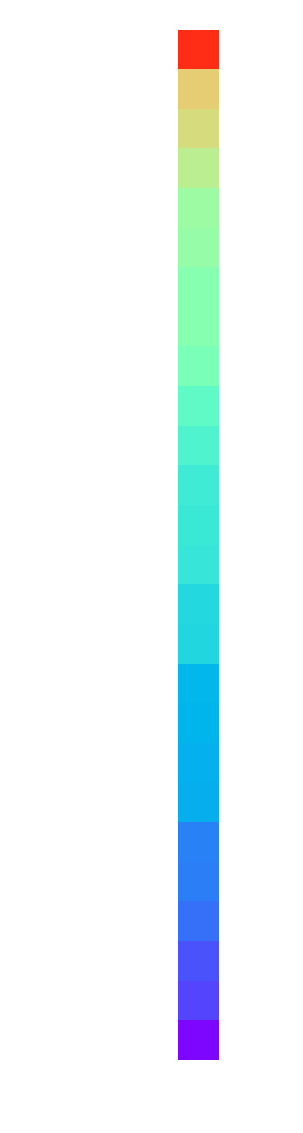

In [8]:
fig = plt.figure(figsize=(0.175,len(cancer_mean_hrd)*0.175))
ax = fig.add_subplot(1,1,1)
sns.heatmap( pd.DataFrame(cancer_mean_hrd),cmap="rainbow",cbar=False,vmin=0,vmax=50)
ax.set_axis_off()
plt.savefig(path_to_results+"Figure2A_1.png",bbox_inches="tight")

In [9]:
cancer_mean_sig3=plt_df.groupby("CancerType").mean()["MSK_Sig3_ratio"].sort_values(ascending=False)
cancer_mean_sig3=cancer_mean_sig3[cancer_mean_hrd_order]

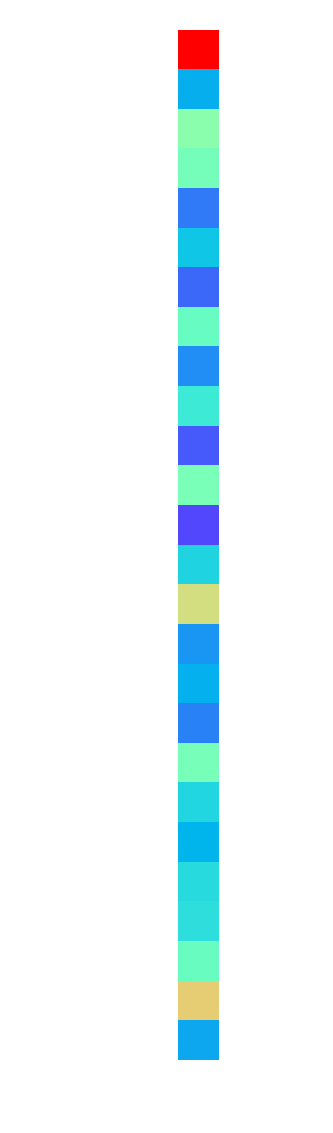

In [10]:
fig = plt.figure(figsize=(0.175,len(cancer_mean_sig3)*0.175))
ax = fig.add_subplot(1,1,1)
sns.heatmap( pd.DataFrame(cancer_mean_sig3),cmap="rainbow",cbar=False,vmin=0,vmax=0.25)
ax.set_axis_off()
plt.savefig(path_to_results+"Figure2A_2.png",bbox_inches="tight")

In [11]:
mut_by_cancer=plt_df.groupby("CancerType").sum()
mut_by_cancer

,sTP53_mutdel,HA_cases,BRCA12_alteration,BRCA1_methylation,gATM_LOH,gATR_LOH,gBARD1_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,...,sNBN_nonLOH,sPALB2_nonLOH,sRAD50_nonLOH,sRAD51B_nonLOH,sRAD51C_nonLOH,sRAD51D_nonLOH,sRAD51_nonLOH,sRAD52_nonLOH,HRD_score,MSK_Sig3_ratio
CancerType,,,,,,,,,,,,,,,,,,,,,
ACC,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1090.0,11.003564
BLCA,201.0,29.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,11165.0,16.093245
BRC,346.0,116.0,79.0,26.0,9.0,1.0,1.0,19.0,11.0,1.0,...,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,24911.0,113.636694
CESC,22.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5619.0,8.116144
CHOL,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,787.0,3.325552
CRC,310.0,12.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,7.0,3.0,4.0,1.0,1.0,0.0,0.0,1.0,6556.0,22.349260
GBM,121.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3072.0,31.153225
HNSC,357.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,11939.0,23.716968
KRC,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2968.0,121.594946


In [12]:
germline_hrr_all=set( x.replace("_LOH","").replace("_nonLOH","") for x in plt_df.columns[ plt_df.columns.str.contains("g.*LOH")]  )
somatic_hrr_all=set( x.replace("_LOH","").replace("_nonLOH","") for x in plt_df.columns[ plt_df.columns.str.contains("s.*LOH")]  )

germline_hrr_all

{'gATM',
 'gATR',
 'gBARD1',
 'gBLM',
 'gBRCA1',
 'gBRCA2',
 'gBRIP1',
 'gCHEK2',
 'gFANCA',
 'gFANCC',
 'gFANCE',
 'gFANCI',
 'gFANCM',
 'gNBN',
 'gPALB2',
 'gRAD50',
 'gRAD51C',
 'gRAD51D'}

In [13]:
g_loh=mut_by_cancer.loc[:, [ x+"_LOH" for x in sorted(germline_hrr_all)] ].fillna(0)
g_nloh=mut_by_cancer.loc[:, [ x+"_nonLOH" for x in sorted(germline_hrr_all) ] ].fillna(0)

s_loh=mut_by_cancer.loc[:, [ x+"_LOH" for x in sorted(somatic_hrr_all)] ].fillna(0)
s_nloh=mut_by_cancer.loc[:, [ x+"_nonLOH" for x in sorted(somatic_hrr_all)] ].fillna(0)

g_loh

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,gATM_LOH,gATR_LOH,gBARD1_LOH,gBLM_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,gCHEK2_LOH,gFANCA_LOH,gFANCC_LOH,gFANCE_LOH,gFANCI_LOH,gFANCM_LOH,gNBN_LOH,gPALB2_LOH,gRAD50_LOH,gRAD51C_LOH,gRAD51D_LOH
CancerType,,,,,,,,,,,,,,,,,,
ACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BLCA,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BRC,9.0,1.0,1.0,0.0,19.0,11.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0
CESC,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CHOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRC,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GBM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HNSC,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KRC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
g_total=np.add(g_loh,g_nloh)
g_loh_ratio=np.divide( g_loh, g_total).fillna(0)
n_cancer= [ dict_cancer_count[cancer] for cancer in g_total.index]
g_mut_ratio=g_total.apply(lambda x: np.divide(x, n_cancer))*100

s_total=np.add(s_loh,s_nloh)
s_loh_ratio=np.divide( s_loh, s_total).fillna(0)
n_cancer= [ dict_cancer_count[cancer] for cancer in s_total.index]
s_mut_ratio=s_total.apply(lambda x: np.divide(x, n_cancer))*100

g_mut_ratio

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


,gATM_LOH,gATR_LOH,gBARD1_LOH,gBLM_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,gCHEK2_LOH,gFANCA_LOH,gFANCC_LOH,gFANCE_LOH,gFANCI_LOH,gFANCM_LOH,gNBN_LOH,gPALB2_LOH,gRAD50_LOH,gRAD51C_LOH,gRAD51D_LOH
CancerType,,,,,,,,,,,,,,,,,,
ACC,0.000000,0.000000,0.000000,1.098901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BLCA,0.975610,0.243902,0.000000,0.487805,0.243902,0.243902,0.243902,0.975610,0.000000,0.000000,0.000000,0.000000,0.000000,0.243902,0.243902,0.243902,0.487805,0.243902
BRC,0.891972,0.495540,0.099108,0.198216,1.982161,1.783944,0.396432,0.297324,0.099108,0.099108,0.000000,0.000000,0.396432,0.000000,0.198216,0.000000,0.099108,0.000000
CESC,0.000000,0.000000,0.000000,0.355872,0.711744,0.711744,0.355872,0.000000,0.355872,0.000000,0.000000,0.355872,0.711744,0.000000,0.355872,0.000000,0.000000,0.000000
CHOL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRC,0.380952,0.571429,0.190476,0.190476,0.190476,0.380952,0.190476,0.190476,0.000000,0.000000,0.000000,0.190476,0.000000,0.000000,0.380952,0.000000,0.000000,0.190476
GBM,0.259740,0.000000,0.000000,0.259740,0.259740,0.000000,0.259740,0.259740,0.000000,0.000000,0.000000,0.000000,0.000000,0.259740,0.259740,0.259740,0.000000,0.000000
HNSC,0.199203,0.199203,0.000000,0.000000,0.000000,0.398406,0.199203,0.000000,0.199203,0.000000,0.000000,0.000000,0.000000,0.000000,0.398406,0.000000,0.000000,0.000000
KRC,0.143885,0.000000,0.000000,0.143885,0.287770,0.143885,0.143885,0.143885,0.000000,0.000000,0.000000,0.000000,0.431655,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
g_gene_order=[ 'gBRCA1_LOH', 'gBRCA2_LOH']+['gATM_LOH', 'gATR_LOH', 'gBARD1_LOH', 'gBLM_LOH',
                                            'gBRIP1_LOH', 'gCHEK2_LOH', 'gFANCA_LOH', 'gFANCC_LOH',
       'gFANCE_LOH', 'gFANCI_LOH', 'gFANCM_LOH', 'gNBN_LOH', 'gPALB2_LOH',
       'gRAD50_LOH', 'gRAD51C_LOH', 'gRAD51D_LOH']

s_gene_order=[ 'sBRCA1_LOH', 'sBRCA2_LOH']+['sATM_LOH', 'sATR_LOH', 'sBARD1_LOH', 'sBLM_LOH', 
                                            'sBRIP1_LOH', 'sCDK12_LOH', 'sCHEK1_LOH', 'sCHEK2_LOH',
       'sFANCA_LOH', 'sFANCC_LOH', 'sFANCD2_LOH', 'sFANCL_LOH', 'sMRE11A_LOH',
       'sNBN_LOH', 'sPALB2_LOH', 'sRAD50_LOH', 'sRAD51_LOH', 'sRAD51B_LOH',
       'sRAD51C_LOH', 'sRAD51D_LOH', 'sRAD52_LOH']

In [16]:
g_loh_ratio_order=g_loh_ratio.loc[  cancer_mean_hrd_order, g_gene_order  ]
g_mut_ratio_order=g_mut_ratio.loc[  cancer_mean_hrd_order, g_gene_order  ]

s_loh_ratio_order=s_loh_ratio.loc[  cancer_mean_hrd_order, s_gene_order  ]
s_mut_ratio_order=s_mut_ratio.loc[  cancer_mean_hrd_order, s_gene_order  ]

In [17]:
coolwarm=plt.get_cmap("coolwarm")

OV (409)
LUSC (469)
UCS (57)
SARC (234)
BLCA (410)
STES (618)
LUAD (510)
BRC (1009)
HNSC (502)
CHOL (36)
CESC (281)
MESO (82)
SKCM (438)
LIHC (358)
TGCT (128)
PAAD (176)
UCEC (515)
CRC (525)
ACC (91)
PRAD (493)
LGG (509)
GBM (385)
PCPG (178)
UVM (80)
KRC (695)
THCA (484)


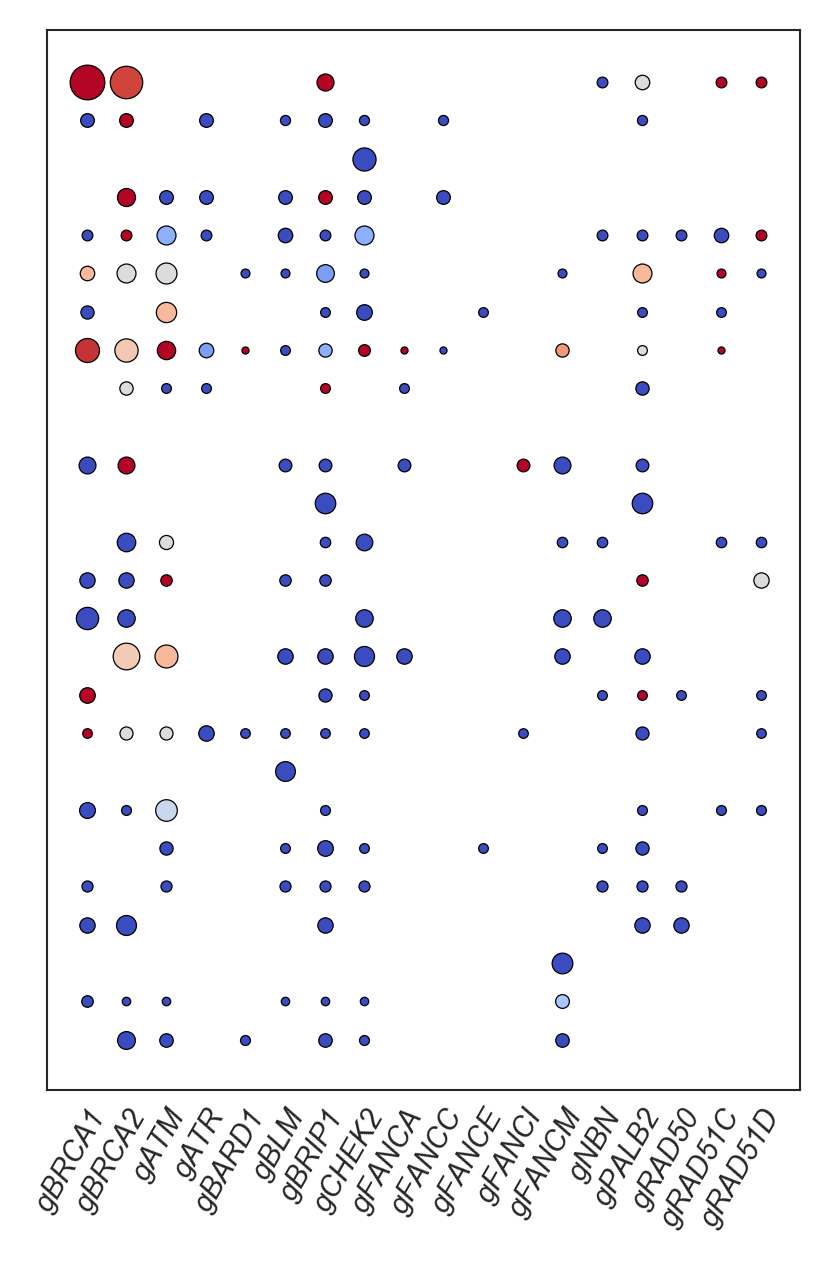

In [18]:
plt_df2=g_loh_ratio_order.T
plt_df3=g_mut_ratio_order.T
nrows,ncols=plt_df2.shape
fig = plt.figure(figsize=(nrows*0.18,ncols*0.18))
ax = fig.add_subplot(1,1,1)

# scatter plot
for nrow in range(nrows):
    for ncol in range(ncols):
        loh_ratio=plt_df2.iloc[nrow,ncol]
        mut_ratio=plt_df3.iloc[nrow,ncol]
        color= coolwarm( int(256*loh_ratio) )
        size=np.log10(mut_ratio+1) *70
        ax.scatter(x=nrow,y=ncol, s=size, c=[color], 
                   vmin=0,vmax=1,edgecolors="k", linewidths=0.3)

ax.set_xlim(-1,nrows)   
ax.set_xticks(range(nrows))
xticklabels=[x.replace("_LOH","") for x in plt_df2.index]
ax.set_xticklabels(xticklabels,fontsize=SMALL_SIZE, rotation=60,
                   ha="right",style="italic",rotation_mode="anchor" )
yticklabels=[ cancer +" ("+str(dict_cancer_count[cancer])+")" for cancer in plt_df2.columns]
ax.set_yticklabels([])#yticklabels,fontsize=15,ha="left",position=(-0.35,1))
for label in yticklabels:
    print(label )

ax.invert_yaxis()

plt.savefig(path_to_results+"Figure2A_3.png",bbox_inches="tight")

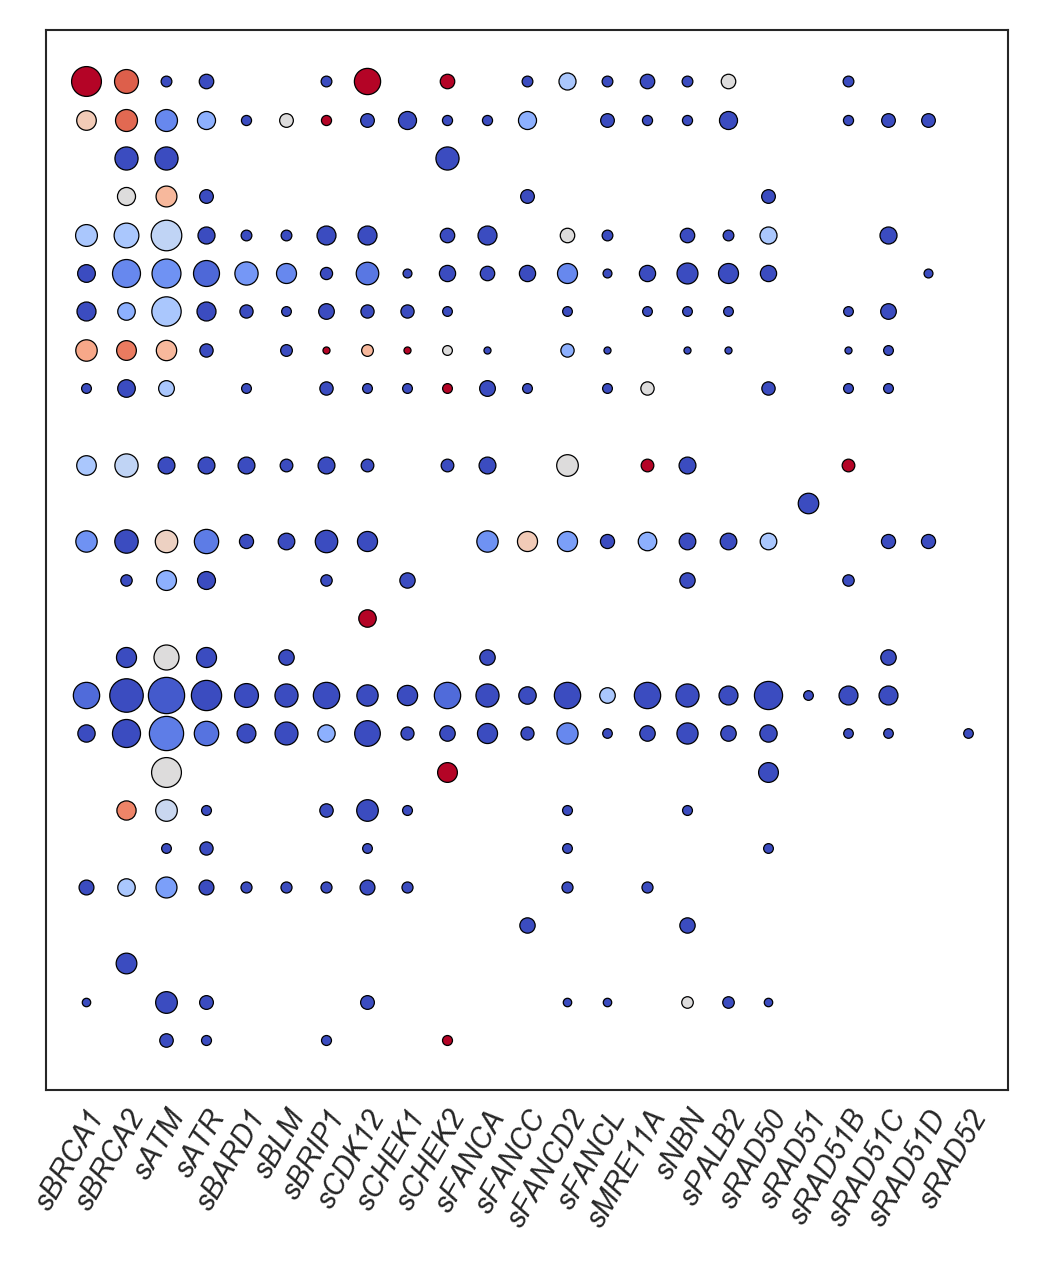

In [19]:
plt_df2=s_loh_ratio_order.T
plt_df3=s_mut_ratio_order.T
nrows,ncols=plt_df2.shape
fig = plt.figure(figsize=(nrows*0.18,ncols*0.18))
ax = fig.add_subplot(1,1,1)

# scatter plot
for nrow in range(nrows):
    for ncol in range(ncols):
        loh_ratio=plt_df2.iloc[nrow,ncol]
        mut_ratio=plt_df3.iloc[nrow,ncol]
        color= coolwarm( int(256*loh_ratio) )
        size=np.log10(mut_ratio+1) *70
        ax.scatter(x=nrow,y=ncol, s=size, c=[color], 
                   vmin=0,vmax=1,edgecolors="k", linewidths=0.3)

ax.set_xlim(-1,nrows)   
ax.set_xticks(range(nrows))
xticklabels=[x.replace("_LOH","") for x in plt_df2.index]
ax.set_xticklabels(xticklabels,fontsize=SMALL_SIZE, rotation=60,
                   ha="right",style="italic",rotation_mode="anchor" )
yticklabels=[ cancer +" ("+str(dict_cancer_count[cancer])+")" for cancer in plt_df2.columns]
ax.set_yticklabels([])#yticklabels,fontsize=15,ha="left",position=(-0.35,1))

ax.invert_yaxis()

plt.savefig(path_to_results+"Figure2A_4.png",bbox_inches="tight")

In [20]:
g_loh_ratio.to_csv(path_to_results+"Figure2A_germline_HRR_LOH_ratio_by_cancer.tsv",sep="\t")
g_mut_ratio.to_csv(path_to_results+"Figure2A_germline_HRR_mut_ratio_by_cancertype.tsv",sep="\t")

s_loh_ratio.to_csv(path_to_results+"Figure2A_somatic_HRR_LOH_ratio_by_cancer.tsv",sep="\t")
s_mut_ratio.to_csv(path_to_results+"Figure2A_somatic_HRR_mut_ratio_by_cancertype.tsv",sep="\t")

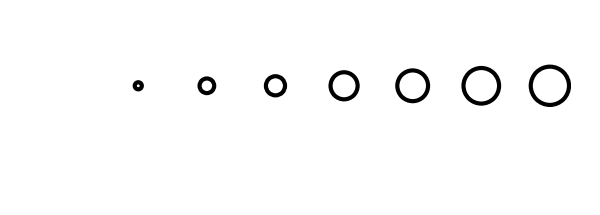

In [21]:
fig = plt.figure(figsize=(1.95,0.5))
ax = fig.add_subplot(1,1,1)

percentages= [ 0.1,0.5,1,3,5,10,15]
x=[1]*len(percentages)
y=np.arange(1,1.5*len(percentages),1.5)
sizes=[ np.log10(x+1)*70 for x in percentages]
ax.scatter(y,x,s=sizes,c="w",marker="o",edgecolors="k", linewidths=1)
ax.set_axis_off()

plt.savefig(path_to_results+"Figure2A_5.png",bbox_inches="tight")

# Figure 2B

In [22]:
plt_df2= pd.concat( [plt_df[["CancerType"]], pd.get_dummies(plt_df["HRR_alteration_type"])],sort=False,axis=1)
plt_df2=plt_df2.drop(["0"],axis=1)
plt_df2

,CancerType,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
P00001,THCA,0,0,0,0,0
P00002,KRC,0,0,0,0,0
P00003,KRC,0,0,0,0,0
P00004,OV,0,1,0,0,0
P00005,BRC,0,0,0,0,0
...,...,...,...,...,...,...
P09843,PRAD,0,0,0,0,0
P09844,THCA,0,0,0,0,0
P09845,PRAD,0,0,0,0,0
P09846,BLCA,0,0,0,0,0


In [23]:
count_per_cancer=plt_df2.groupby("CancerType").sum()
count_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2,0,0,0,1
BLCA,9,6,1,0,13
BRC,16,48,24,7,21
CESC,0,5,0,0,5
CHOL,0,0,0,0,0
CRC,6,2,0,0,4
GBM,1,1,0,0,0
HNSC,1,1,1,0,6
KRC,0,0,0,0,2


In [24]:
# exclude count <=2
count_per_cancer=count_per_cancer.loc[ np.sum(count_per_cancer,axis=1)>=3,:]
count_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2,0,0,0,1
BLCA,9,6,1,0,13
BRC,16,48,24,7,21
CESC,0,5,0,0,5
CRC,6,2,0,0,4
HNSC,1,1,1,0,6
LIHC,2,0,0,0,3
LUAD,11,1,0,0,2
LUSC,1,11,2,0,7


In [25]:
from collections import Counter
dict_cancer_count=Counter(plt_df["CancerType"])
n_cancer=[ dict_cancer_count[cancer] for cancer in count_per_cancer.index]
n_cancer

[91,
 410,
 1009,
 281,
 525,
 502,
 358,
 510,
 469,
 409,
 176,
 493,
 234,
 438,
 618,
 128,
 515]

In [26]:
ratio_per_cancer=count_per_cancer.apply(lambda x: np.divide(x,n_cancer))*100
ratio_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2.197802,0.000000,0.000000,0.000000,1.098901
BLCA,2.195122,1.463415,0.243902,0.000000,3.170732
BRC,1.585728,4.757185,2.378593,0.693756,2.081269
CESC,0.000000,1.779359,0.000000,0.000000,1.779359
CRC,1.142857,0.380952,0.000000,0.000000,0.761905
HNSC,0.199203,0.199203,0.199203,0.000000,1.195219
LIHC,0.558659,0.000000,0.000000,0.000000,0.837989
LUAD,2.156863,0.196078,0.000000,0.000000,0.392157
LUSC,0.213220,2.345416,0.426439,0.000000,1.492537


In [27]:
cancer_ratio_order=np.sum(ratio_per_cancer,axis=1).sort_values(ascending=False).index
col_order=["BRCA12","BRCA1_methylation","ATM","Other_HRR","Combined"]

OV (122/409)
TGCT (16/128)
BRC (116/1009)
BLCA (29/410)
STES (33/618)
LUSC (21/469)
SARC (10/234)
PAAD (7/176)
SKCM (16/438)
CESC (10/281)
ACC (3/91)
UCEC (16/515)
PRAD (14/493)
LUAD (14/510)
CRC (12/525)
HNSC (9/502)
LIHC (5/358)


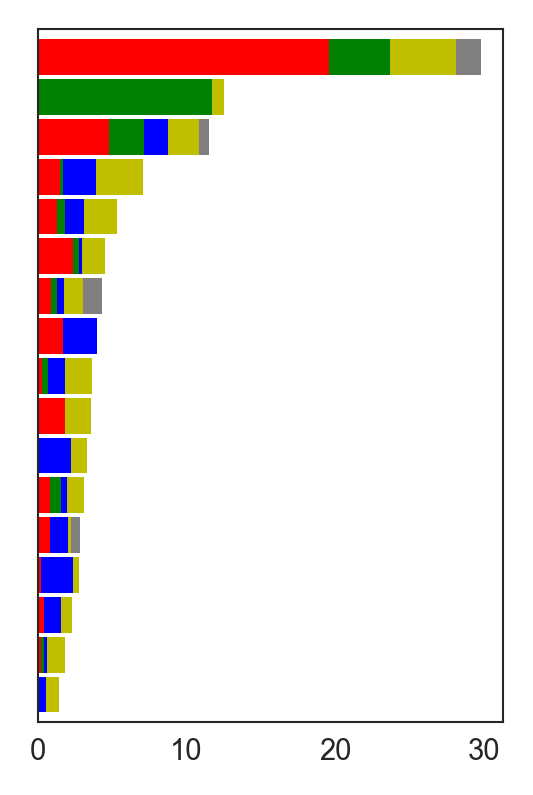

In [28]:
plt_df3=ratio_per_cancer.loc[cancer_ratio_order,col_order ]

N=len(plt_df3)
fig = plt.figure(figsize=(2.0,N*0.18))
ax = fig.add_subplot(1,1,1)
plt_df3.plot.barh(stacked=True,width=0.9,lw=0,color=["r","g","b","y","grey"],ax=ax)
ax.set_title('',fontsize=16)
ax.set_xlabel('',fontsize=15)
ax.set_yticklabels([],fontsize=15)
ax.set_ylabel('',fontsize=15)

ax.tick_params(labelsize=SMALL_SIZE)
#ax.margins(.01)
ax.invert_yaxis()
for i in plt_df3.index:
    print(i+" ({}/{})".format( np.sum(count_per_cancer.loc[i]), dict_cancer_count[i] ) )
    
ax.legend([])
plt.savefig(path_to_results+"Figure2B.png",bbox_inches="tight")

# Figure 2C & 3A

In [29]:
dict_cancer_color={
'ACC': (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 'BLCA': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 'BRC': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 'CESC': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 'CHOL': (0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 'CRC': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 'ESCA': (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 'GBM': (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 'HNSC': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 'KRC': (1.0, 1.0, 0.6),
 'LGG': (0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 'LIHC': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'LUAD': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'LUSC': (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 'MESO': (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 'OV': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'PAAD': (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 'PCPG': (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 'PRAD': (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 'SARC': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'SKCM': (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 'STES': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'TGCT': (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 'THCA': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 'UCEC': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 'UCS': (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 'UVM': (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
'Others': 'grey'}

In [30]:
mean_by_cancer=plt_df.groupby("CancerType").mean()[["sTP53_mutdel","HRD_score","MSK_Sig3_ratio"]]
mean_by_cancer

,sTP53_mutdel,HRD_score,MSK_Sig3_ratio
CancerType,,,
ACC,0.197802,12.247191,0.120918
BLCA,0.490244,27.842893,0.039348
BRC,0.342914,25.602261,0.112847
CESC,0.078292,20.212230,0.028883
CHOL,0.111111,21.861111,0.092376
CRC,0.590476,12.583493,0.042570
GBM,0.314286,8.347826,0.081553
HNSC,0.711155,24.315682,0.047339
KRC,0.054676,4.345534,0.174957


In [31]:
# remove number of HA cases <=2
ha_cases_count_per_cancer=plt_df.groupby("CancerType").sum()["HA_cases"]
selected_cancer=ha_cases_count_per_cancer[ha_cases_count_per_cancer>=3].index

rS = 0.682, p = 1.24e-04


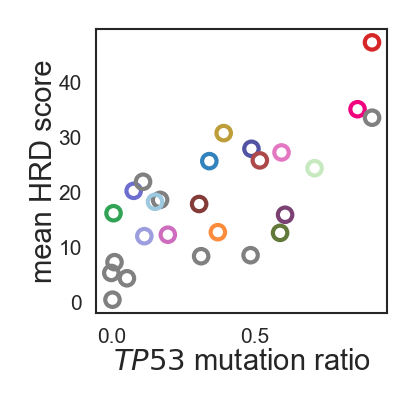

In [32]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
plt_df2=mean_by_cancer
x="sTP53_mutdel"
y="HRD_score"
cancers=plt_df2.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( plt_df2[x],plt_df2[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean HRD score',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(plt_df2[x],plt_df2[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_1.png",bbox_inches="tight")

rS = -0.166, p = 4.18e-01


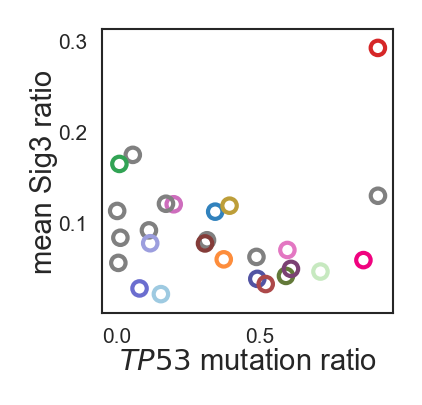

In [33]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
plt_df2=mean_by_cancer
x="sTP53_mutdel"
y="MSK_Sig3_ratio"
cancers=plt_df2.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( plt_df2[x],plt_df2[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean Sig3 ratio',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(plt_df2[x],plt_df2[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_2.png",bbox_inches="tight")

In [34]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

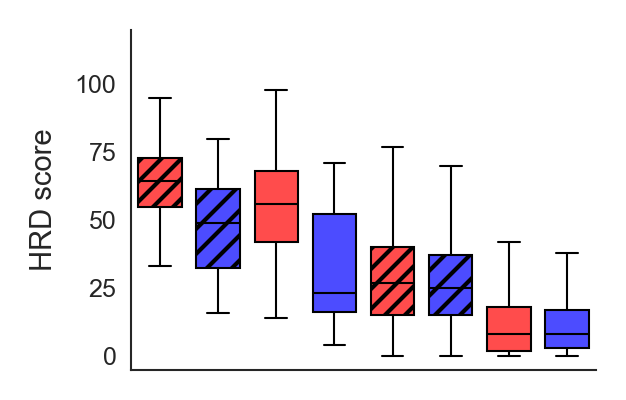

In [35]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_1_1.png",bbox_inches="tight")

In [36]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 3.96e-05
p = 2.65e-05
p = 4.14e-03
p = 1.24e-02
p = 8.69e-10
p = 0.00e+00


In [37]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

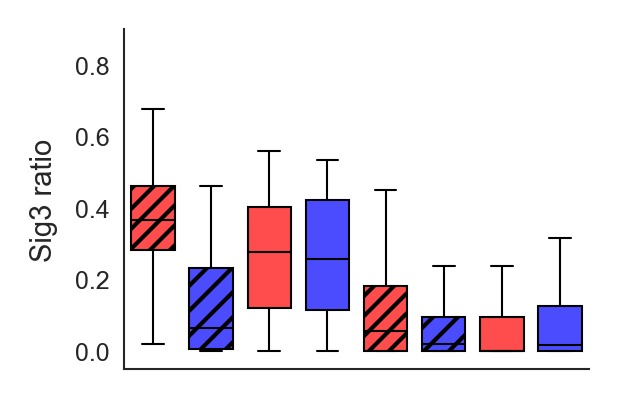

In [38]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_1_2.png",bbox_inches="tight")

In [39]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 2.92e-09
p = 4.85e-01
p = 9.51e-24
p = 1.49e-10
p = 2.65e-03
p = 5.15e-14


In [40]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

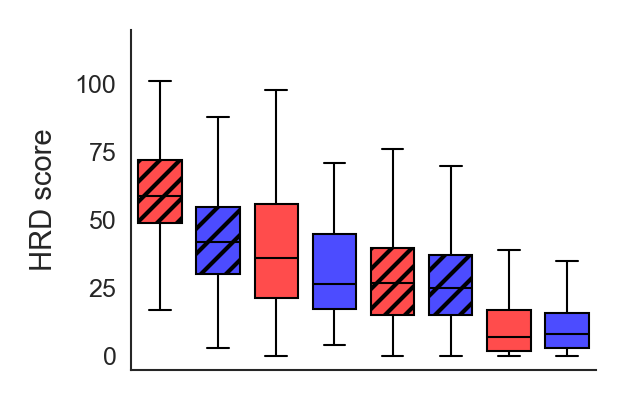

In [41]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_2_1.png",bbox_inches="tight")

In [42]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 8.46e-08
p = 8.12e-03
p = 9.48e-03
p = 1.14e-02
p = 3.05e-22
p = 0.00e+00


In [43]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

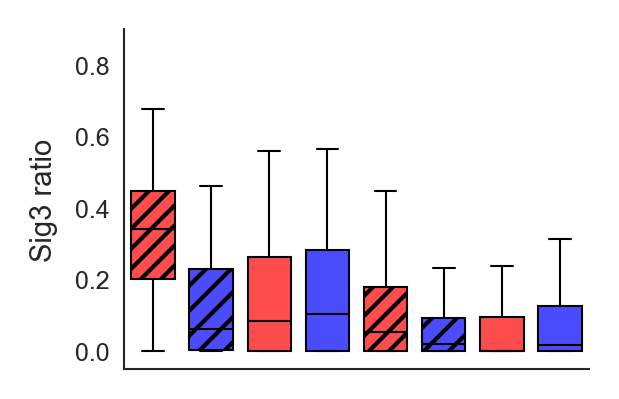

In [44]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_2_2.png",bbox_inches="tight",)

In [45]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 1.54e-12
p = 2.63e-01
p = 5.04e-23
p = 3.22e-10
p = 1.41e-13
p = 7.46e-13


# Supplementary Figure

In [46]:
cancer_type_exception=["OV","BRC","PRAD","PAAD"]

In [47]:
Counter(plt_df.loc[plt_df["CancerType"].isin(cancer_type_exception),"CancerType"])

Counter({'OV': 409, 'BRC': 1009, 'PRAD': 493, 'PAAD': 176})

p = 1.74e-02
p = 1.28e-01
p = 3.77e-07
p = 2.49e-11
p = 5.57e-07
p = 0.00e+00


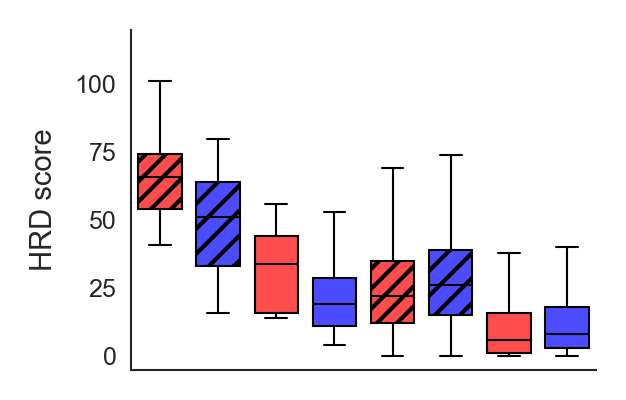

In [48]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_1.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 3.87e-01
p = 3.77e-01
p = 6.26e-07
p = 1.00e-10
p = 8.44e-06
p = 0.00e+00


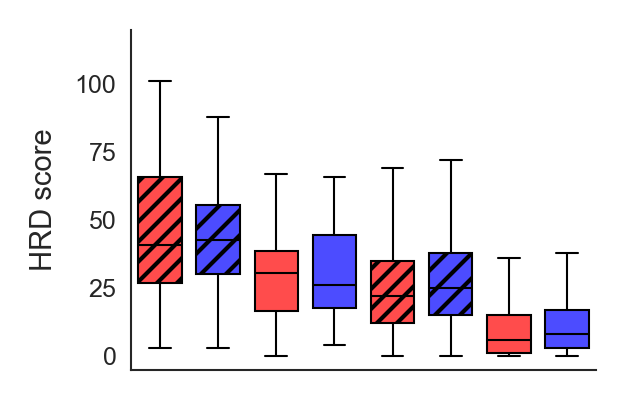

In [49]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_3.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 8.13e-04
p = 3.20e-01
p = 4.59e-02
p = 1.27e-09
p = 4.44e-01
p = 1.07e-02


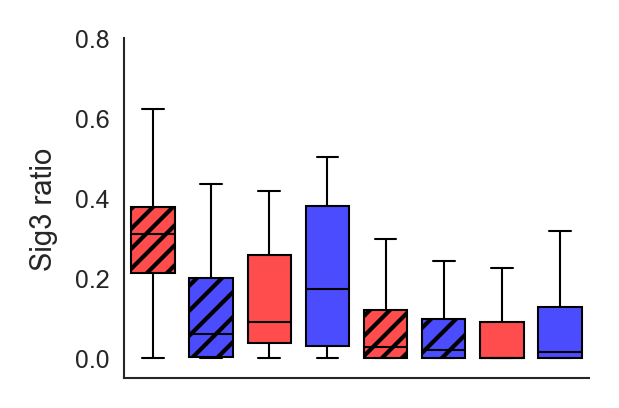

In [50]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.8)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_2.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 1.27e-01
p = 3.10e-02
p = 2.91e-02
p = 4.08e-09
p = 4.80e-02
p = 1.54e-02


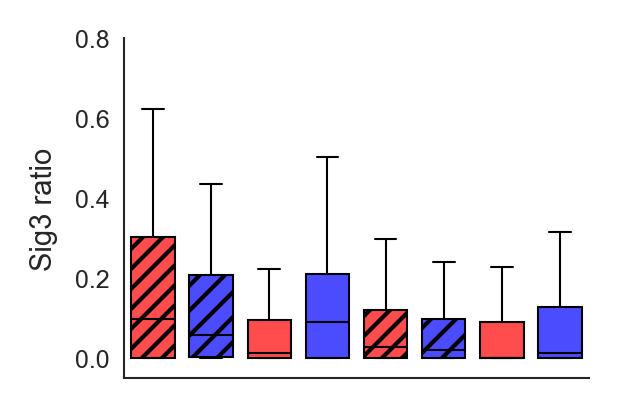

In [51]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.8)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_4.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

# Figure 2C & 3A in validation dataset

In [52]:
plt_df3=pd.read_csv(path_to_data+"Data_for_Figure2C_3A_validation.tsv",
                    sep="\t",index_col=0)
plt_df3.head()

,Patient,Sample,Sex,Cancer type,Detailed cancer type,Purity,Ploidy,Genome doubled,Hypermutated,Germline BRCA1,...,NtAI,Signature 3,HRD score,HRD_score,aBRCA,sTP53_mut,sTP53_del,sTP53_mutdel,Gender_sTP53m,Gender_aBRCA
Sample_ID,,,,,,,,,,,,,,,,,,,,,
P-0000067-T01,P-0000067,P-0000067-T01-WES,Female,Ovarian cancer,High-grade serous ovarian cancer,0.71,3.7,True,No,0,...,26.0,2.900000e-01,1.147055,66.0,1,1,0,1,Female_TP53m,Female_Biallelic
P-0000117-T01,P-0000117,P-0000117-T01-WES,Male,Esophagogastric cancer,Stomach adenocarcinoma,0.62,2.0,False,No,1,...,17.0,3.600000e-01,0.977029,49.0,1,0,0,0,Male_TP53wt,Male_Biallelic
P-0000122-T01,P-0000122,P-0000122-T01-WES,Female,Uterine sarcoma,Uterine perivascular epithelioid cell tumor,0.96,1.8,False,No,0,...,12.0,5.200000e-02,-0.214029,33.0,1,1,0,1,Female_TP53m,Female_Biallelic
P-0000152-T03,P-0000152,P-0000152-T03-WES,Female,Breast cancer,Invasive breast carcinoma,0.42,3.0,True,No,0,...,15.0,4.600000e-10,-0.282772,36.0,0,0,0,0,Female_TP53wt,Female_HetWt
P-0000184-T02,P-0000184,P-0000184-T02-WES,Male,Bladder cancer,Urethral squamous cell carcinoma,0.60,3.4,True,No,0,...,23.0,1.100000e-10,-0.480646,47.0,0,0,0,0,Male_TP53wt,Male_HetWt


In [53]:
plt_df3["Cancer type"].unique()

array(['Ovarian cancer', 'Esophagogastric cancer', 'Uterine sarcoma',
       'Breast cancer', 'Bladder cancer', 'Hepatobiliary cancer',
       'Prostate cancer', 'Cns cancer', 'Melanoma', 'Colorectal cancer',
       'Glioma', 'Skin cancer, non-melanoma', 'Endometrial cancer',
       'Non-small cell lung cancer', 'Soft tissue sarcoma',
       'Germ cell tumor', 'Gastrointestinal neuroendocrine tumor',
       'Pancreatic cancer', 'Adrenocortical carcinoma',
       'Head and neck cancer', 'Non-hodgkin lymphoma', 'Anal cancer',
       'Bone cancer', 'Small bowel cancer', 'Thyroid cancer',
       'Ampullary carcinoma', 'Small cell lung cancer',
       'Renal cell carcinoma', 'Gastrointestinal stromal tumor',
       'Cancer of unknown primary', 'Salivary gland cancer',
       'Cervical cancer', 'Nerve sheath tumor',
       'Peripheral nervous system', 'Appendiceal cancer',
       'Choroid plexus tumor', 'Mesothelioma', 'Sellar tumor',
       'Vaginal cancer', 'Embryonal tumor', 'Pheochromocy

In [54]:
# exclude blood tumor
plt_df3=plt_df3[~plt_df3["Cancer type"].isin(["Non-hodgkin lymphoma",'Histiocytosis'])]
plt_df3.shape

(813, 28)

In [55]:
# convert cancer type according to TCGA data
dict_nature_tcga_cancer_name={'Adrenocortical carcinoma':"ACC",
                              'Bladder cancer':"BLCA",
                              'Breast cancer':"BRC", 
                              'Colorectal cancer':"CRC", 
                              'Endometrial cancer':"UCEC",
                              'Esophagogastric cancer':"STES", 
                              'Head and neck cancer':"HNSC", 
                              'Hepatobiliary cancer':"LIHC", 
                              'Melanoma':"SKCM",
                              'Mesothelioma':"MESO",
                              'Non-small cell lung cancer':"LUSC", 
                              'Ovarian cancer':"OV",
                              'Pancreatic cancer':"PAAD",
                              'Prostate cancer':"PRAD",
                              'Renal cell carcinoma':"KRC", 
                              'Salivary gland cancer':"HNSC",
                              'Cervical cancer':"CESC",
                              'Soft tissue sarcoma':"SARC", 
                              'Thyroid cancer':"THCA",
                              'Uterine sarcoma':"SARC",
                              'Breast sarcoma':"SARC"}

In [56]:
plt_df3["CancerType"]=plt_df3["Cancer type"].replace(dict_nature_tcga_cancer_name)

In [57]:
mean_by_cancer=plt_df3.groupby("CancerType").mean()[["sTP53_mutdel","HRD_score","Signature 3"]]
mean_by_cancer["Sample"]=plt_df3.groupby("CancerType").count()["Sample"]
mean_by_cancer

,sTP53_mutdel,HRD_score,Signature 3,Sample
CancerType,,,,
ACC,0.500000,12.750000,1.050000e-01,4
Ampullary carcinoma,0.500000,29.500000,2.662500e-01,4
Anal cancer,0.500000,48.500000,1.250000e-01,2
Appendiceal cancer,0.000000,4.000000,1.800000e-10,1
BLCA,0.447368,22.500000,5.449742e-02,38
BRC,0.459854,39.072993,2.001782e-01,137
Bone cancer,0.200000,21.600000,3.060000e-02,5
CESC,0.500000,7.000000,1.732500e-08,2
CRC,0.609756,15.439024,3.205128e-02,41


In [58]:
# curate sample count <=4
mean_by_cancer=mean_by_cancer[mean_by_cancer["Sample"]>=4]

rS = 0.574, p = 1.73e-03


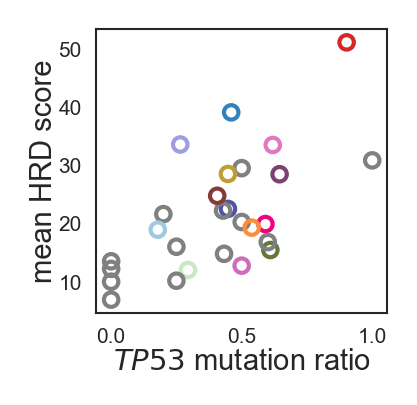

In [59]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
tmp_df=mean_by_cancer
x="sTP53_mutdel"
y="HRD_score"
cancers=tmp_df.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( tmp_df[x],tmp_df[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean HRD score',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(tmp_df[x],tmp_df[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_3.png",bbox_inches="tight")

In [60]:
value="HRD_score"
tmp_df=plt_df3.dropna(subset=[value])
PPP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

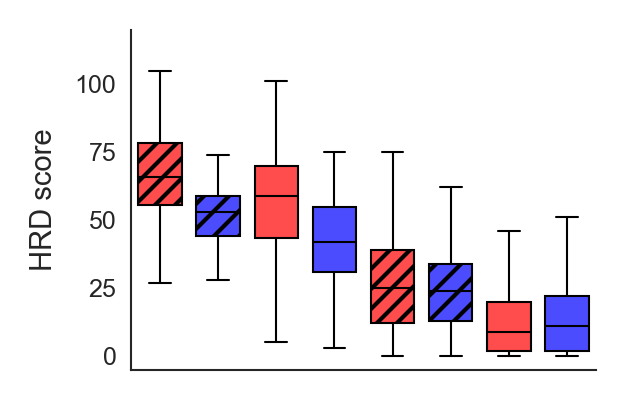

In [61]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_3_1.png",bbox_inches="tight")

In [62]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 5.11e-05
p = 1.02e-03
p = 2.65e-01
p = 2.14e-01
p = 9.96e-05
p = 1.07e-21


In [63]:
value="Signature 3"
tmp_df=plt_df3.dropna(subset=[value])
PPP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

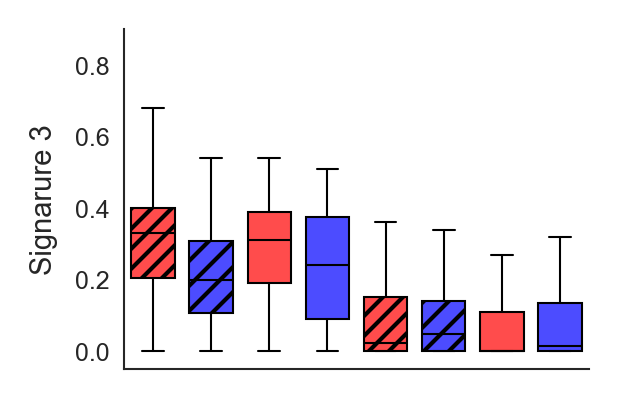

In [64]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Signarure 3",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_3_2.png",bbox_inches="tight")

In [65]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 2.56e-04
p = 4.66e-02
p = 3.03e-01
p = 1.32e-01
p = 3.62e-01
p = 2.80e-02
